# Trading Bot Optimization and Simulation

This notebook runs the optimization process for the trading bot using different algorithms (PSO, PSOSA, ABC) and simulates the bot's performance.

## 1. Imports

Import necessary classes from the `BotCode` directory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from trading_bot import TradingBotOptimiser, TradingBotInstance
from data_processors import TradingDataProcessor, DataLoader
from optimisers import PSO, PSOSA, ArtificialBeeColony

## 2. Configuration

Set the path to the dataset and define parameters for the optimization process.

In [2]:
# --- Configuration --- 
train_dataset_path = '../Data/trainingDaily.csv' 
test_dataset_path = '../Data/testDaily.csv' 


# Optimization Parameters
rng_seed = 42          # Random seed for reproducibility
population_size = 20   # Number of particles/bees in the swarm/colony
n_iter = 100            # Number of optimization iterations (increase for better results, but longer runtime)

# PSO Specific Parameters
pso_p_increment = 0.5
pso_g_increment = 0.5

# PSOSA Specific Parameters (inherits PSO params + SA params)
psosa_p_increment = 0.5
psosa_g_increment = 0.5
psosa_w_max = 0.9        # Max inertia weight
psosa_w_min = 0.4        # Min inertia weight
psosa_v_max = 1          # Max velocity (can be tuned)
psosa_init_temp = 100    # Initial temperature for SA
psosa_cool_rate = 0.95   # Cooling rate for SA

# ABC Specific Parameters
abc_pos_age_limit = 10   # Limit for abandoning a food source

# Check if dataset exists
if not os.path.exists(train_dataset_path):
    print(f"Error: Training dataset not found at '{train_dataset_path}'. Please update the path.")
    # Consider stopping execution here or handling it differently
    # raise FileNotFoundError(f"Training dataset not found at '{train_dataset_path}'")
else:
    print(f"Training dataset found at: {train_dataset_path}")

if not os.path.exists(test_dataset_path):
     print(f"Warning: Test dataset not found at '{test_dataset_path}'. Testing phase will be skipped.")
else:
    print(f"Test dataset found at: {test_dataset_path}")

Training dataset found at: ../Data/trainingDaily.csv
Test dataset found at: ../Data/testDaily.csv


## 3. Run Optimizations

Instantiate the optimizers and the `TradingBotOptimiser` for each algorithm, then run the optimization.

In [3]:
results = {}

if os.path.exists(train_dataset_path):
    # --- PSO --- 
    print("--- Starting PSO Optimisation ---")
    pso_optimiser_instance = PSO(
        rng_seed=rng_seed, 
        population_size=population_size, 
        p_increment=pso_p_increment, 
        g_increment=pso_g_increment
    )
    pso_bot_optimiser = TradingBotOptimiser(train_dataset_path, pso_optimiser_instance)
    pso_best_pos, pso_best_fitness = pso_bot_optimiser.optimise(n_iter)
    results['PSO'] = {'params': pso_best_pos, 'fitness': pso_best_fitness}
    print("--- PSO Optimisation Complete ---\n")

    # --- PSOSA --- 
    # print("--- Starting PSOSA Optimisation ---")
    # psosa_optimiser_instance = PSOSA(
    #     rng_seed=rng_seed, 
    #     population_size=population_size, 
    #     p_increment=psosa_p_increment, 
    #     g_increment=psosa_g_increment, 
    #     iters=n_iter, # PSOSA needs total iterations for weight calculation
    #     w_max=psosa_w_max,
    #     w_min=psosa_w_min,
    #     v_max=psosa_v_max,
    #     init_temp=psosa_init_temp,
    #     cool_rate=psosa_cool_rate
    # )
    # psosa_bot_optimiser = TradingBotOptimiser(dataset_path, psosa_optimiser_instance)
    # psosa_best_pos, psosa_best_fitness = psosa_bot_optimiser.optimise(n_iter)
    # results['PSOSA'] = {'params': psosa_best_pos, 'fitness': psosa_best_fitness}
    # print("--- PSOSA Optimisation Complete ---\n")

    # --- ABC --- 
    print("--- Starting ABC Optimisation ---")
    abc_optimiser_instance = ArtificialBeeColony(
        rng_seed=rng_seed, 
        population_size=population_size, 
        pos_age_limit=abc_pos_age_limit
    )
    abc_bot_optimiser = TradingBotOptimiser(train_dataset_path, abc_optimiser_instance)
    abc_best_pos, abc_best_fitness = abc_bot_optimiser.optimise(n_iter)
    results['ABC'] = {'params': abc_best_pos, 'fitness': abc_best_fitness}
    print("--- ABC Optimisation Complete ---\n")
else:
    print("Skipping optimizations because training dataset was not found.")

--- Starting PSO Optimisation ---
iteration: 0
iteration: 5
iteration: 10
iteration: 15
iteration: 20
iteration: 25
iteration: 30
iteration: 35
iteration: 40
iteration: 45
iteration: 50
iteration: 55
iteration: 60
iteration: 65
iteration: 70
iteration: 75
iteration: 80
iteration: 85
iteration: 90
iteration: 95
--- PSO Optimisation Complete ---

--- Starting ABC Optimisation ---
iteration: 0
iteration: 5
iteration: 10
iteration: 15
iteration: 20
iteration: 25
iteration: 30
iteration: 35
iteration: 40
iteration: 45
iteration: 50
iteration: 55
iteration: 60
iteration: 65
iteration: 70
iteration: 75
iteration: 80
iteration: 85
iteration: 90
iteration: 95
--- ABC Optimisation Complete ---



## 4. Display Optimization Results

Print the best parameters and the corresponding fitness (simulated final cash) found by each optimizer.

In [4]:
print("\n--- Optimization Results Summary ---")
if results:
    # Parameter names for clarity
    param_names = ['window_sma', 'window_ema', 'window_lma', 'ema_alpha', 'w1', 'w2', 'w3', 'w4', 'w5', 'threshold']
    
    for name, result in results.items():
        print(f"\nOptimizer: {name}")
        print(f"  Best Fitness (Final Cash - Training Data): {result['fitness']:.2f}")
        print("  Best Parameters:")
        # Round parameters for display, especially floats
        formatted_params = []
        for i, p in enumerate(result['params']):
           if i < 3: # Window sizes
               formatted_params.append(f"{param_names[i]}={int(round(p))}")
           elif i == 3: # Alpha
                formatted_params.append(f"{param_names[i]}={p:.4f}")
           else: # Weights and Threshold
                formatted_params.append(f"{param_names[i]}={p:.2f}")
        print("    " + ", ".join(formatted_params))
else:
    print("No optimization results to display (likely skipped due to missing training data).")


--- Optimization Results Summary ---

Optimizer: PSO
  Best Fitness (Final Cash - Training Data): 28357.39
  Best Parameters:
    window_sma=97, window_ema=65, window_lma=43, ema_alpha=0.0000, w1=10.00, w2=-100.00, w3=-66.97, w4=-100.00, w5=-57.56, threshold=169.85

Optimizer: ABC
  Best Fitness (Final Cash - Training Data): 23271.58
  Best Parameters:
    window_sma=71, window_ema=14, window_lma=55, ema_alpha=0.5569, w1=-4.31, w2=-67.78, w3=-58.46, w4=-100.00, w5=4.93, threshold=49.22


## 5. Visualize Bot Behavior
### 5.1 Visualization on Training Data
Visualize the buy/sell signals generated by a bot instance (using either default or optimized parameters) overlaid on the price chart. This uses code adapted from `.data_testing.py`.


--- Visualizing Bot Run with Best PSO Parameters (on Training Data) ---


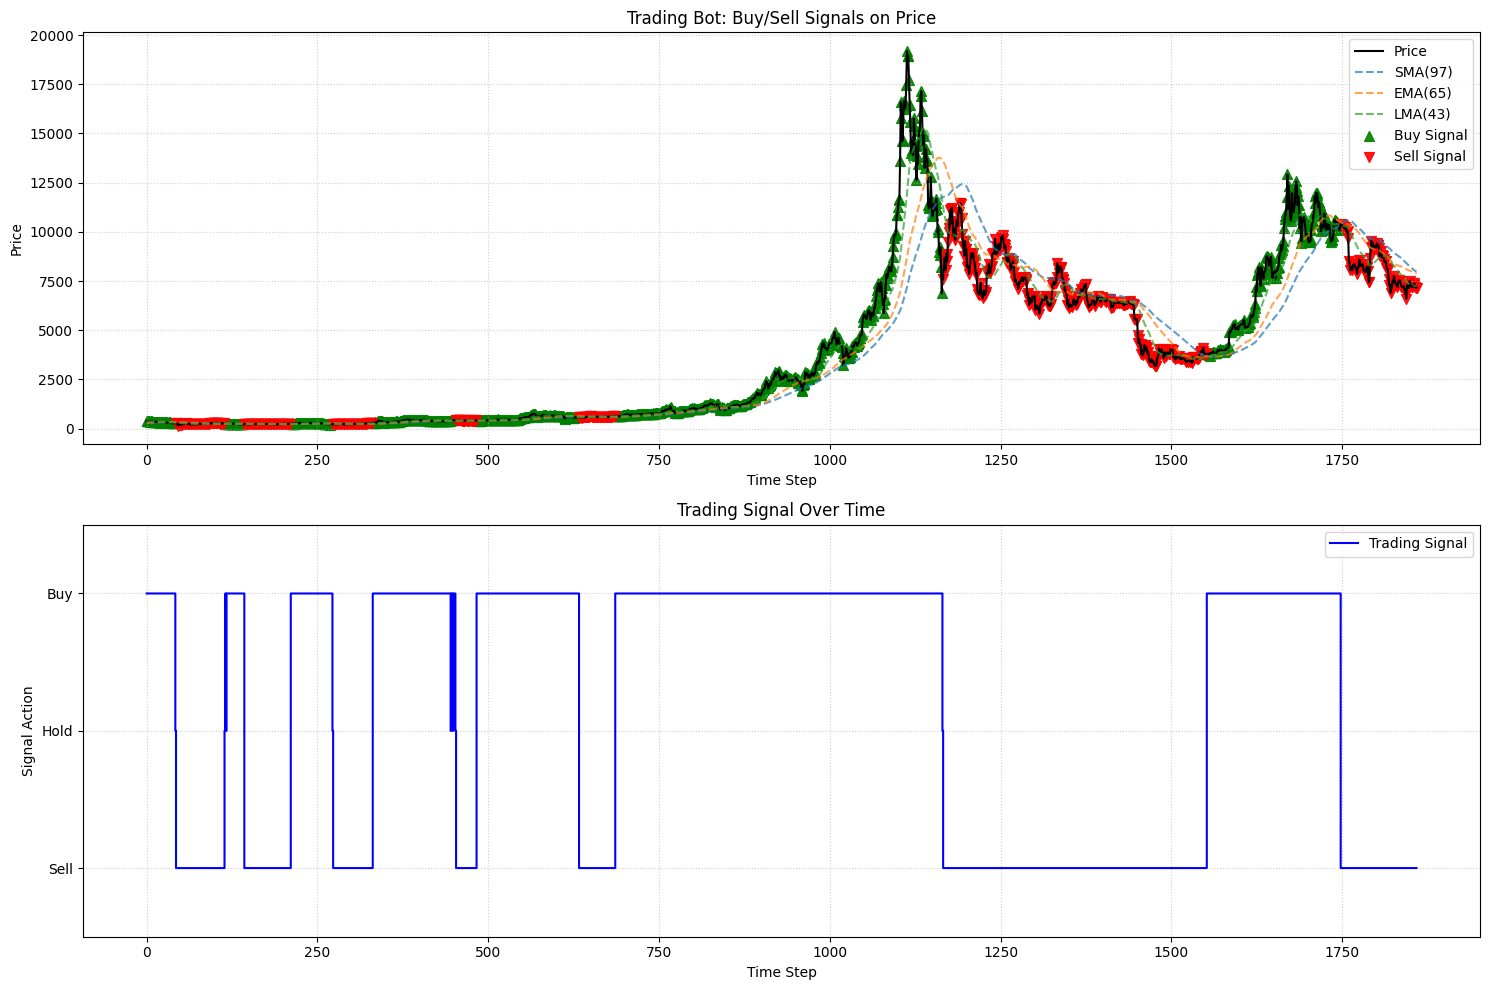

In [5]:
def plot_bot_run(bot_instance, data_loader):
    """Helper function to plot the results of a bot run."""
    signals = []
    prices_trimmed = []
    buy_signals_price = []
    sell_signals_price = []
    
    # Reset loader and bot state if necessary (DataLoader might need a reset method)
    # data_loader.reset() # Assuming a reset method exists
    bot_instance.cash = 1000 # Reset bot's cash
    bot_instance.btc = 0     # Reset bot's btc
    bot_instance.current_signal = -1 # Reset signal state

    while True:
        step_data = data_loader.step()
        if step_data is None:
            break
        sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
        signal = bot_instance._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
        signals.append(signal)
        price = data_loader.get_price() # Get price for the *current* step
        prices_trimmed.append(price)

        # Store buy/sell signals at the price they occurred
        if signal == 1:
            buy_signals_price.append(price)
            sell_signals_price.append(np.nan)
        elif signal == -1:
            sell_signals_price.append(price)
            buy_signals_price.append(np.nan)
        else:
            buy_signals_price.append(np.nan)
            sell_signals_price.append(np.nan)
            
    # Ensure all lists have the same length for plotting
    min_len = len(prices_trimmed)
    signals = signals[:min_len]
    buy_signals_price = buy_signals_price[:min_len]
    sell_signals_price = sell_signals_price[:min_len]
    
    # Get the corresponding moving averages from the loader
    # Note: DataLoader calculates these on init, need to ensure lengths match
    sma_plot = data_loader.sma[:min_len]
    ema_plot = data_loader.ema[:min_len]
    lma_plot = data_loader.lma[:min_len]
    
    # === Plotting ===
    plt.figure(figsize=(15, 10))

    # --- Price & Moving Averages --- 
    plt.subplot(2, 1, 1)
    plt.plot(prices_trimmed, label="Price", color='black', linewidth=1.5)
    plt.plot(sma_plot, label=f"SMA({data_loader.window_sma})", linestyle='--', alpha=0.7)
    plt.plot(ema_plot, label=f"EMA({data_loader.window_ema})", linestyle='--', alpha=0.7)
    plt.plot(lma_plot, label=f"LMA({data_loader.window_lma})", linestyle='--', alpha=0.7)
    # Plot buy/sell markers
    plt.scatter(range(min_len), buy_signals_price, label='Buy Signal', color='green', marker='^', s=50, alpha=0.9)
    plt.scatter(range(min_len), sell_signals_price, label='Sell Signal', color='red', marker='v', s=50, alpha=0.9)
    plt.title("Trading Bot: Buy/Sell Signals on Price")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)

    # --- Signal Strength --- 
    plt.subplot(2, 1, 2)
    signal_array = np.array(signals)
    plt.plot(signal_array, label="Trading Signal", color='blue', drawstyle='steps-post') # Use steps for discrete signals
    # Add threshold lines for context
    # plt.axhline(y=bot_instance.threshold, color='grey', linestyle='--', label='Buy Threshold')
    # plt.axhline(y=-bot_instance.threshold, color='grey', linestyle='--', label='Sell Threshold')
    plt.ylim(-1.5, 1.5) # Set explicit y-limits for signal plot
    plt.yticks([-1, 0, 1], ['Sell', 'Hold', 'Buy']) # Label y-axis clearly
    plt.title("Trading Signal Over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Signal Action")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

# --- Run Visualization ---
if 'PSO' in results and os.path.exists(train_dataset_path):
    print("\n--- Visualizing Bot Run with Best PSO Parameters (on Training Data) ---")
    best_pso_params = results['PSO']['params']
    sim_params = best_pso_params.tolist()
    sim_params[0] = int(round(sim_params[0]))
    sim_params[1] = int(round(sim_params[1]))
    sim_params[2] = int(round(sim_params[2]))
    
    # Create a new bot instance and loader specifically for plotting on training data
    plot_bot = TradingBotInstance(train_dataset_path, *sim_params)
    plot_loader = DataLoader(train_dataset_path, sim_params[0], sim_params[1], sim_params[2], sim_params[3])
    
    plot_bot_run(plot_bot, plot_loader)
else:
    print("\nSkipping visualization on training data (PSO results not available or training dataset missing).")

# Example of visualizing with default parameters:
# print("\n--- Visualizing Bot Run with Default Parameters (on Training Data) ---")
# default_params = [10, 20, 30, 0.1, 1, 1, 1, 1, 1, 100] # Example defaults
# default_bot = TradingBotInstance(dataset_path, *default_params)
# default_loader = DataLoader(dataset_path, default_params[0], default_params[1], default_params[2], default_params[3])
# plot_bot_run(default_bot, default_loader)

## 6. Simulation Summary
### 6.1 Training Phase Summary
Summary of the configuration and optimization results on the training data.

In [6]:
print("Simulation Run Summary")
print("-----------------------")

print("\nDataset Used for Optimization (Training):")
# Use f-string for variable interpolation
print(f"  File: {train_dataset_path}")

print("\nGeneral Optimization Parameters:")
print(f"  Random Seed: {rng_seed}")
print(f"  Population Size: {population_size}")
print(f"  Number of Iterations: {n_iter}")

print("\nAlgorithm-Specific Parameters Configured:")
# Check if PSO results exist before printing its parameters
if 'PSO' in results:
    print("  PSO:")
    print(f"    p_increment: {pso_p_increment}")
    print(f"    g_increment: {pso_g_increment}")

# Check if ABC results exist before printing its parameters
if 'ABC' in results:
    print("  ABC:")
    print(f"    pos_age_limit: {abc_pos_age_limit}")

print("\nOptimization Results (on Training Data):")
if results:
    param_names = ['window_sma', 'window_ema', 'window_lma', 'ema_alpha', 'w1', 'w2', 'w3', 'w4', 'w5', 'threshold']
    all_fitness = {} # To store fitness for final comparison

    for name, result in results.items():
        print(f"\n  Optimizer: {name}")
        fitness_value = result['fitness']
        all_fitness[name] = fitness_value
        print(f"    Best Fitness (Final Cash - Training Data): {fitness_value:.2f}")
        print(f"    Best Parameters:")
        formatted_params = []
        for i, p in enumerate(result['params']):
           # Use standard comparison operators
           if i < 3: # Window sizes
               formatted_params.append(f"{param_names[i]}={int(round(p))}")
           elif i == 3: # Alpha
                formatted_params.append(f"{param_names[i]}={p:.4f}")
           else: # Weights and Threshold
                formatted_params.append(f"{param_names[i]}={p:.2f}")
        # Indent the parameter list for clarity
        print(f"      {', '.join(formatted_params)}")

    # Print final cash comparison
    print("\nFinal Cash Comparison (Training Data):")
    if all_fitness:
        for name, fitness in all_fitness.items():
             print(f"  {name}: {fitness:.2f}")
    else:
        print("  No results to compare.")

else:
    # Use consistent formatting for the 'no results' message
    print("  No optimization results were generated (e.g., training dataset not found or optimization skipped).")



Simulation Run Summary
-----------------------

Dataset Used for Optimization (Training):
  File: ../Data/trainingDaily.csv

General Optimization Parameters:
  Random Seed: 42
  Population Size: 20
  Number of Iterations: 100

Algorithm-Specific Parameters Configured:
  PSO:
    p_increment: 0.5
    g_increment: 0.5
  ABC:
    pos_age_limit: 10

Optimization Results (on Training Data):

  Optimizer: PSO
    Best Fitness (Final Cash - Training Data): 28357.39
    Best Parameters:
      window_sma=97, window_ema=65, window_lma=43, ema_alpha=0.0000, w1=10.00, w2=-100.00, w3=-66.97, w4=-100.00, w5=-57.56, threshold=169.85

  Optimizer: ABC
    Best Fitness (Final Cash - Training Data): 23271.58
    Best Parameters:
      window_sma=71, window_ema=14, window_lma=55, ema_alpha=0.5569, w1=-4.31, w2=-67.78, w3=-58.46, w4=-100.00, w5=4.93, threshold=49.22

Final Cash Comparison (Training Data):
  PSO: 28357.39
  ABC: 23271.58


### 6.2 Simulation on Test Data

Now, we simulate the trading bot on the unseen test dataset (`testDaily.csv`) using the parameters optimized on the training data.

In [7]:
print("\n--- Running Simulation on Test Data ---")
test_results = {}

if not os.path.exists(test_dataset_path):
    print(f"Skipping test simulation: Test dataset not found at '{test_dataset_path}'.")
elif not results:
    print("Skipping test simulation: No optimization results available from training phase.")
else:
    for name, train_result in results.items():
        print(f"\nSimulating with {name} optimized parameters...")
        params = train_result['params'].tolist()
        # Ensure window sizes are integers
        params[0] = int(round(params[0])) # window_sma
        params[1] = int(round(params[1])) # window_ema
        params[2] = int(round(params[2])) # window_lma
        
        try:
            # Create a bot instance specifically for the test data
            test_bot = TradingBotInstance(test_dataset_path, *params)
            
            # --- Manual Simulation Loop ---
            test_loader = DataLoader(test_dataset_path, params[0], params[1], params[2], params[3])
            
            # Reset bot state for the test run
            test_bot.cash = 1000.0
            test_bot.btc = 0.0
            last_price = 0 # To hold the final price for valuation
            
            while True:
                step_data = test_loader.step()
                if step_data is None: 
                    break # End of data
                
                current_price = test_loader.get_price()
                if current_price is None or current_price <= 0:
                    continue # Skip if price is invalid (e.g., at the very beginning)
                
                last_price = current_price # Update last known price
                
                # Get signal using the bot's internal logic
                signal = test_bot._trading_signal(*step_data) # Pass all indicator values
                
                # Execute trade based on signal (simple buy/sell all logic)
                if signal == 1 and test_bot.cash > 0: # Buy signal
                    amount_to_buy = test_bot.cash / current_price
                    test_bot.btc += amount_to_buy
                    test_bot.cash = 0
                elif signal == -1 and test_bot.btc > 0: # Sell signal
                    test_bot.cash += test_bot.btc * current_price
                    test_bot.btc = 0
                # else: Hold (do nothing)
            
            # Calculate final portfolio value after the loop
            final_cash_test = test_bot.cash + test_bot.btc * last_price
            # --- End Manual Simulation Loop ---
            
            test_results[name] = final_cash_test
            print(f"  Final Cash on Test Data ({name}): {final_cash_test:.2f}")
            
            # Store test fitness back into the main results dict for unified summary
            results[name]['test_fitness'] = final_cash_test 
            
        except FileNotFoundError:
             print(f"  Error: Test dataset not found at '{test_dataset_path}' during {name} simulation.")
        except AttributeError as e:
             print(f"  Error during {name} simulation: {e}. Check if TradingBotInstance has required attributes (cash, btc) or methods (_trading_signal).")
        except Exception as e:
             print(f"  An unexpected error occurred during {name} simulation: {e}")

print("--- Test Data Simulation Complete ---")


--- Running Simulation on Test Data ---

Simulating with PSO optimized parameters...
  Final Cash on Test Data (PSO): 2970.73

Simulating with ABC optimized parameters...
  Final Cash on Test Data (ABC): 2897.63
--- Test Data Simulation Complete ---


## 7. Visualize Bot Behavior on Test Data

Visualize the buy/sell signals generated by the bot using the optimized parameters on the *test* dataset.


--- Visualizing Bot Run with Best PSO Parameters (on Test Data) ---


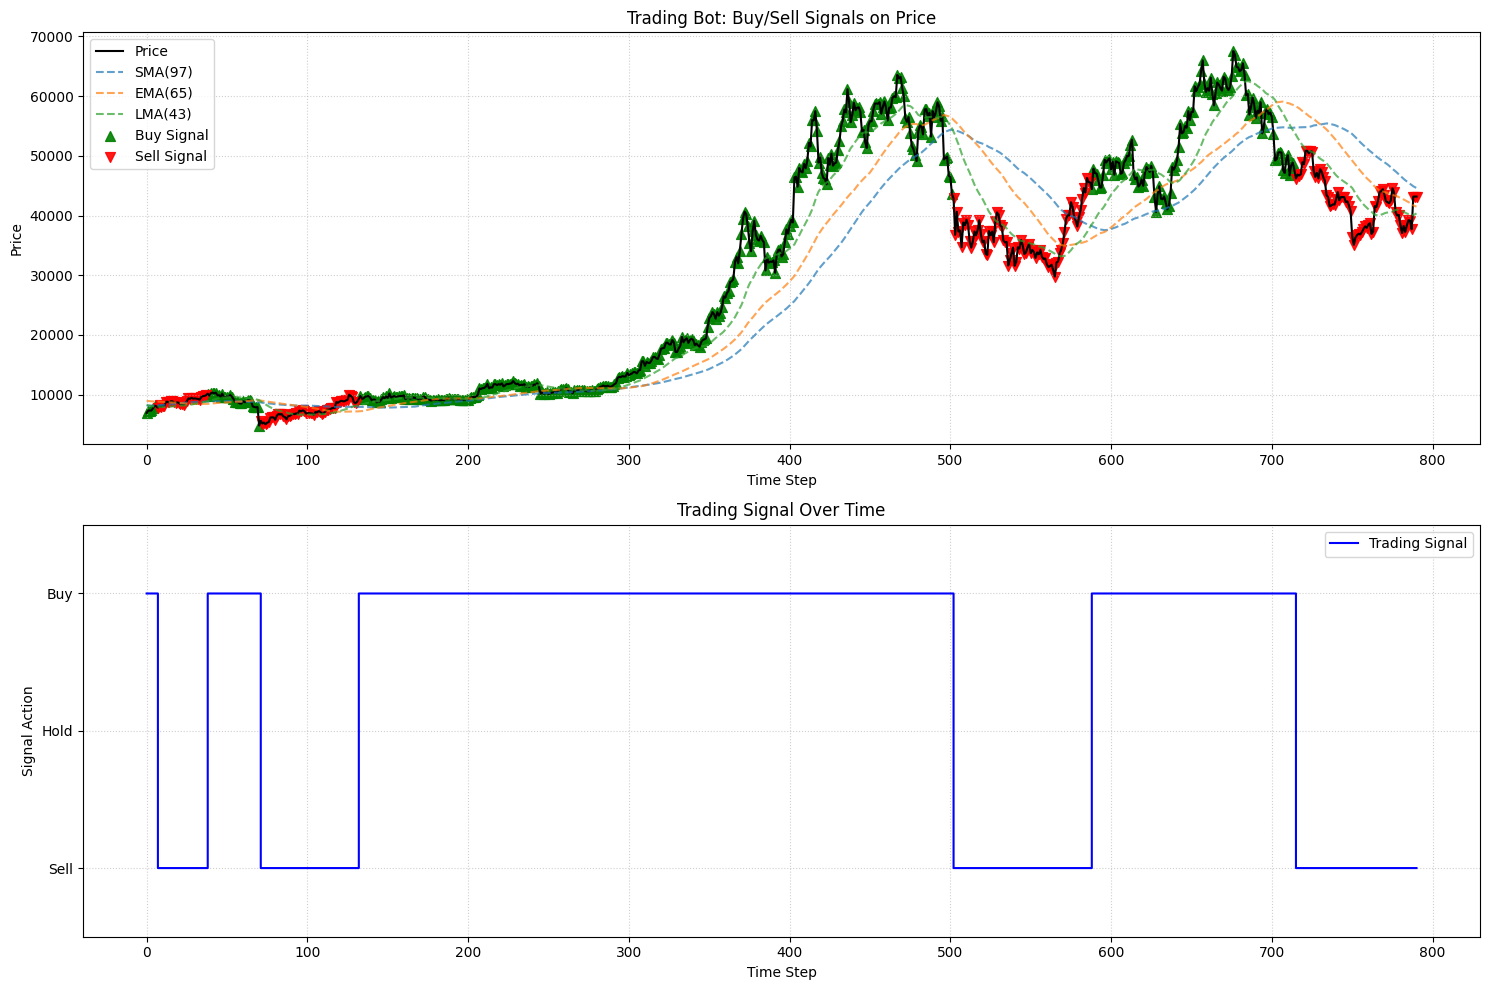

In [8]:
# --- Run Visualization on Test Data ---
if not os.path.exists(test_dataset_path):
    print(f"\nSkipping visualization on test data: Test dataset not found at '{test_dataset_path}'.")
elif not results:
     print("\nSkipping visualization on test data: No optimization results available.")
else:
    # Visualize for the best performing algorithm on training data, e.g., PSO
    # You could loop here to visualize all if desired.
    algo_to_visualize = 'PSO' # Or choose based on best training/test performance
    if algo_to_visualize in results:
        print(f"\n--- Visualizing Bot Run with Best {algo_to_visualize} Parameters (on Test Data) ---")
        best_params = results[algo_to_visualize]['params']
        sim_params = best_params.tolist()
        sim_params[0] = int(round(sim_params[0]))
        sim_params[1] = int(round(sim_params[1]))
        sim_params[2] = int(round(sim_params[2]))
        
        try:
            # Create a new bot instance and loader specifically for plotting on test data
            plot_bot_test = TradingBotInstance(test_dataset_path, *sim_params)
            plot_loader_test = DataLoader(test_dataset_path, sim_params[0], sim_params[1], sim_params[2], sim_params[3])
            
            # Use the existing plotting function
            plot_bot_run(plot_bot_test, plot_loader_test)
        except FileNotFoundError:
            print(f"  Error: Test dataset not found at '{test_dataset_path}' during visualization setup.")
        except Exception as e:
            print(f"  An error occurred during test data visualization setup: {e}")
            
    else:
        print(f"\nSkipping visualization on test data: Results for '{algo_to_visualize}' not found.")

## 8. Final Summary

Consolidated summary of configuration, optimization results on training data, and simulation results on test data.

In [9]:
print("Final Simulation Run Summary")
print("============================")

print("\nDatasets Used:")
print(f"  Training/Optimization: {train_dataset_path}")
print(f"  Testing:               {test_dataset_path}")

print("\nGeneral Optimization Parameters:")
print(f"  Random Seed: {rng_seed}")
print(f"  Population Size: {population_size}")
print(f"  Number of Iterations: {n_iter}")

print("\nAlgorithm-Specific Parameters Configured:")
if 'PSO' in results:
    print("  PSO:")
    print(f"    p_increment: {pso_p_increment}")
    print(f"    g_increment: {pso_g_increment}")
if 'ABC' in results:
    print("  ABC:")
    print(f"    pos_age_limit: {abc_pos_age_limit}")
# Add PSOSA if uncommented earlier

print("\n--- Results --- ")
if results:
    param_names = ['window_sma', 'window_ema', 'window_lma', 'ema_alpha', 'w1', 'w2', 'w3', 'w4', 'w5', 'threshold']
    
    for name, result in results.items():
        print(f"\nOptimizer: {name}")
        print(f"  Best Parameters (from Training):")
        formatted_params = []
        for i, p in enumerate(result['params']):
           if i < 3: formatted_params.append(f"{param_names[i]}={int(round(p))}")
           elif i == 3: formatted_params.append(f"{param_names[i]}={p:.4f}")
           else: formatted_params.append(f"{param_names[i]}={p:.2f}")
        print(f"    {', '.join(formatted_params)}")
        
        # Training Fitness
        train_fitness = result.get('fitness', None)
        if train_fitness is not None:
            print(f"  Performance on Training Data (Final Cash): {train_fitness:.2f}")
        else:
            print("  Performance on Training Data: Not Available")
            
        # Test Fitness
        test_fitness = result.get('test_fitness', None)
        if test_fitness is not None:
            print(f"  Performance on Test Data (Final Cash):     {test_fitness:.2f}")
        elif os.path.exists(test_dataset_path):
             print("  Performance on Test Data: Simulation did not run or failed.")
        else:
             print(f"  Performance on Test Data: Skipped (Test dataset not found at '{test_dataset_path}')")

    # Final Comparison
    print("\n--- Final Cash Comparison ---")
    print("Algorithm | Training Data | Test Data")
    print("----------|---------------|-----------")
    has_test_results = any('test_fitness' in r for r in results.values())
    
    for name, result in results.items():
        train_f = f"{result.get('fitness', 'N/A'):.2f}" if result.get('fitness') is not None else 'N/A'
        test_f = f"{result.get('test_fitness', 'N/A'):.2f}" if result.get('test_fitness') is not None else 'N/A'
        if not has_test_results and os.path.exists(test_dataset_path):
             test_f = 'Failed'
        elif not os.path.exists(test_dataset_path):
             test_f = 'Skipped'
             
        print(f"{name:<9} | {train_f:>13} | {test_f:>10}")

else:
    print("\nNo optimization results were generated (e.g., training dataset not found or optimization skipped).")


Final Simulation Run Summary

Datasets Used:
  Training/Optimization: ../Data/trainingDaily.csv
  Testing:               ../Data/testDaily.csv

General Optimization Parameters:
  Random Seed: 42
  Population Size: 20
  Number of Iterations: 100

Algorithm-Specific Parameters Configured:
  PSO:
    p_increment: 0.5
    g_increment: 0.5
  ABC:
    pos_age_limit: 10

--- Results --- 

Optimizer: PSO
  Best Parameters (from Training):
    window_sma=97, window_ema=65, window_lma=43, ema_alpha=0.0000, w1=10.00, w2=-100.00, w3=-66.97, w4=-100.00, w5=-57.56, threshold=169.85
  Performance on Training Data (Final Cash): 28357.39
  Performance on Test Data (Final Cash):     2970.73

Optimizer: ABC
  Best Parameters (from Training):
    window_sma=71, window_ema=14, window_lma=55, ema_alpha=0.5569, w1=-4.31, w2=-67.78, w3=-58.46, w4=-100.00, w5=4.93, threshold=49.22
  Performance on Training Data (Final Cash): 23271.58
  Performance on Test Data (Final Cash):     2897.63

--- Final Cash Comparis